In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [3]:
# Load the Google stock prices dataset
df = pd.read_csv('GOOGL.csv')

# Extract the 'Close' prices
data = df['Close'].values.reshape(-1, 1)


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [4]:

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)



In [9]:
# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size
train_data, test_data = data_normalized[0:train_size,:], data_normalized[train_size:len(data_normalized),:]
'''
'''

In [10]:
# Convert the time series data into sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])  # input sequence
        y.append(data[i + seq_length])  # target (y)
    return np.array(X), np.array(y)

In [11]:
seq_length = 10  # Sequence length
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [12]:
# Build the RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=32)

111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0063


In [14]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [15]:
# Inverse normalize the predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

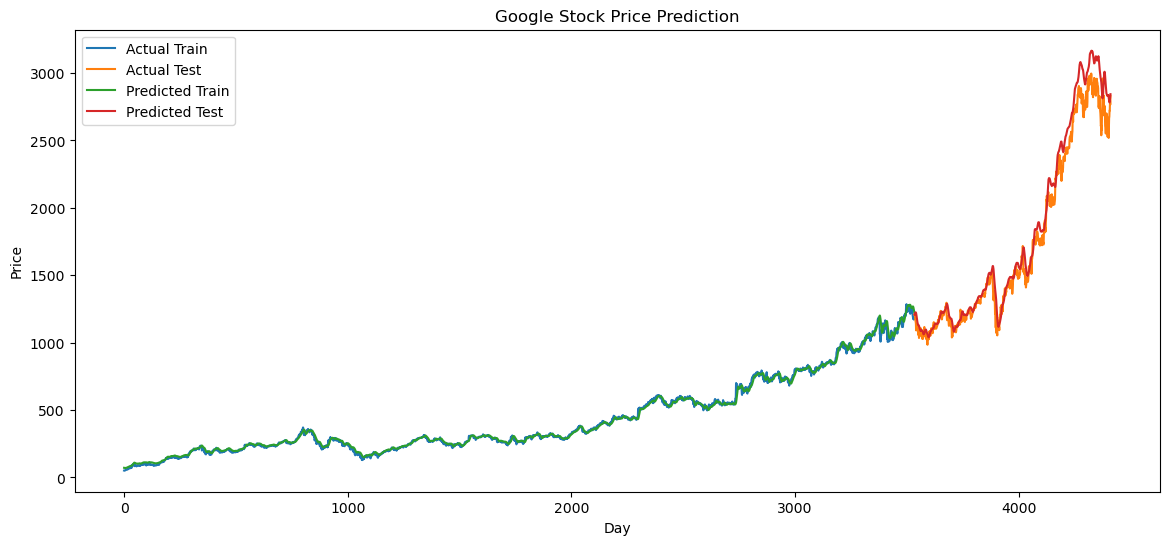

In [16]:
# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(np.arange(0, len(y_train)), y_train, label='Actual Train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test')
plt.plot(np.arange(0, len(train_predictions)), train_predictions, label='Predicted Train')
plt.plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), test_predictions, label='Predicted Test')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()